#Initial setup

##Imports

In [1]:
import tarfile
import os
import pathlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
import pandas as pd
from tensorflow.keras.layers import  Conv2D, MaxPool2D, Flatten, Dense, Activation
from tensorflow.keras.models import Sequential

##Global variables

In [2]:
dataset_dir = "./drive/MyDrive/DataSets/food-101/images/"

##Functions

In [3]:
def extract_data(dir_path, target_folder, train_ratio, dataset_name):
  main_path = os.path.join(dir_path, target_folder)
  train_path = os.path.join("./dataset" ,dataset_name, "train",target_folder)
  test_path = os.path.join("./dataset" ,dataset_name, "test", target_folder)
  os.makedirs(train_path, exist_ok=True)
  os.makedirs(test_path, exist_ok=True)
  all_images = os.listdir(main_path)
  random.shuffle(all_images)
  split_index = int(len(all_images) * train_ratio)
  train_images = all_images[:split_index]
  test_images = all_images[split_index:]
  move_images(main_path, train_path, train_images)
  move_images(main_path, test_path, test_images)

def move_images(src, dest, indexes):
  for image in indexes:
    src_path = os.path.join(src, image)
    dest_path = os.path.join(dest, image)
    shutil.copy(src_path, dest_path)

#Download and unzip data

In [ ]:
!wget "http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz"

--2023-12-31 16:48:03--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2023-12-31 16:48:04--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  19.4MB/s    in 3m 53s  

2023-12-31 16:51:58 (20.4 MB/s) - ‘food-101.tar.gz’ saved [4996278331/4996278331]



In [ ]:

def unzip_tar_gz(file_path, extract_path):
    with tarfile.open(file_path, 'r:gz') as tar:
        tar.extractall(extract_path)

# Example usage:
file_path = 'food-101.tar.gz'
extract_path = './drive/MyDrive/DataSets'
unzip_tar_gz(file_path, extract_path)

FileNotFoundError: ignored

#Build CNN binary model

##Load data

In [ ]:
target_folders = ["pizza", "hummus"]
dataset_name = "Food101"

for target_folder in target_folders:
  extract_data(dataset_dir, target_folder, 0.8, dataset_name)

tf.random.set_seed(42)
dataset_name = "Food101"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data_augmented = ImageDataGenerator(rescale=1./255,
                                          rotation_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          width_shift_range=0.2,
                                          height_shift_range=0.3,
                                          horizontal_flip=True)

train_path = f"./dataset/{dataset_name}/train"
test_path = f"./dataset/{dataset_name}/test"

train_data = train_datagen.flow_from_directory(directory=train_path,
                                                batch_size=32,
                                                target_size=(244, 244),
                                                class_mode="binary",
                                                seed=42)

test_data = test_datagen.flow_from_directory(directory=test_path,
                                                batch_size=32,
                                                target_size=(244, 244),
                                                class_mode="binary",
                                                seed=42)

class_indices = train_data.class_indices

# Print the class indices
print("Class indices:", class_indices)

# Get the class labels
class_labels = list(class_indices.keys())


##Comile model

In [ ]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(244, 244, 3)),

    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

##Compile and fit the model

In [ ]:
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
50/50 [==============================] - 176s 3s/step - loss: 0.6475 - accuracy: 0.6131 - val_loss: 0.6159 - val_accuracy: 0.6475
Epoch 2/5
50/50 [==============================] - 171s 3s/step - loss: 0.5433 - accuracy: 0.7269 - val_loss: 0.6151 - val_accuracy: 0.6725
Epoch 3/5
50/50 [==============================] - 184s 4s/step - loss: 0.4804 - accuracy: 0.7588 - val_loss: 0.4952 - val_accuracy: 0.7425
Epoch 4/5
50/50 [==============================] - 200s 4s/step - loss: 0.4238 - accuracy: 0.8094 - val_loss: 0.6323 - val_accuracy: 0.7050
Epoch 5/5
50/50 [==============================] - 174s 3s/step - loss: 0.4259 - accuracy: 0.7969 - val_loss: 0.4798 - val_accuracy: 0.7675


##V2

In [ ]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(244, 244, 3)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
50/50 [==============================] - 83s 2s/step - loss: 0.6547 - accuracy: 0.5938 - val_loss: 0.6024 - val_accuracy: 0.6750
Epoch 2/10
50/50 [==============================] - 79s 2s/step - loss: 0.5393 - accuracy: 0.7294 - val_loss: 0.6133 - val_accuracy: 0.6975
Epoch 3/10
50/50 [==============================] - 79s 2s/step - loss: 0.5300 - accuracy: 0.7300 - val_loss: 0.5624 - val_accuracy: 0.7050
Epoch 4/10
50/50 [==============================] - 79s 2s/step - loss: 0.4834 - accuracy: 0.7825 - val_loss: 0.5236 - val_accuracy: 0.7475
Epoch 5/10
50/50 [==============================] - 79s 2s/step - loss: 0.4702 - accuracy: 0.7894 - val_loss: 0.4984 - val_accuracy: 0.7550
Epoch 6/10
50/50 [==============================] - 79s 2s/step - loss: 0.4578 - accuracy: 0.7919 - val_loss: 0.4972 - val_accuracy: 0.7575
Epoch 7/10
50/50 [==============================] - 79s 2s/step - loss: 0.4360 - accuracy: 0.8100 - val_loss: 0.4730 - val_accuracy: 0.7700
Epoch 8/10
50/50 [==

In [ ]:
model_2.evaluate(test_data)

13/13 [==============================] - 7s 493ms/step - loss: 0.4737 - accuracy: 0.7825


[0.4736579954624176, 0.7825000286102295]

##Evaluating the model

<Axes: >

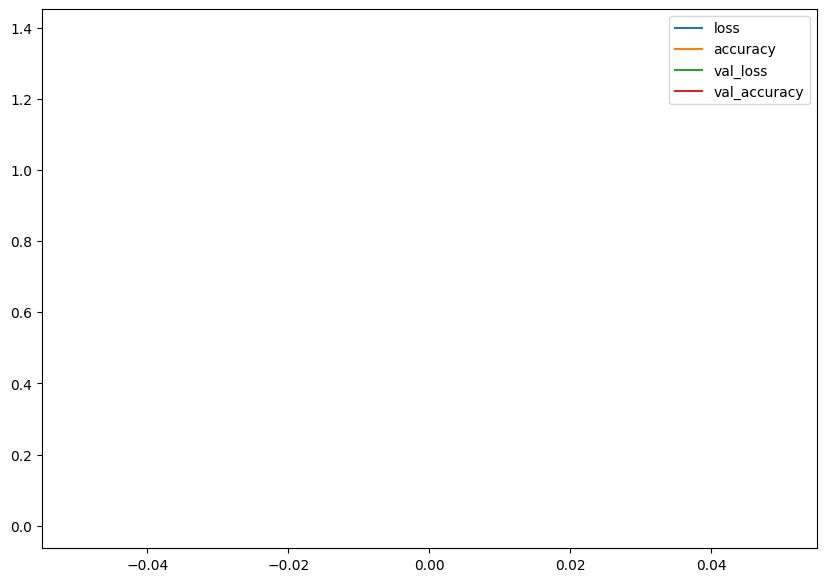

In [ ]:
pd.DataFrame(history_2.history).plot(figsize=(10, 7))

##Test model with custom data

In [ ]:
def pred_and_plot(model, filename, class_names=class_labels):
  img_display = mpimg.imread("test_image.jpg")
  img = tf.io.read_file("test_image.jpg")
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[244,244])
  img = tf.expand_dims(img, axis=0)
  img = img/255.
  pred = model_2.predict(img)

  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  plt.imshow(img_display)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

In [ ]:
!wget "https://www.cookingclassy.com/wp-content/uploads/2014/03/hummus-31.jpg"


--2023-12-31 21:02:37--  https://www.cookingclassy.com/wp-content/uploads/2014/03/hummus-31.jpg
Resolving www.cookingclassy.com (www.cookingclassy.com)... 104.26.14.145, 104.26.15.145, 172.67.71.186, ...
Connecting to www.cookingclassy.com (www.cookingclassy.com)|104.26.14.145|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 158006 (154K) [image/jpeg]
Saving to: ‘hummus-31.jpg’

hummus-31.jpg       100%[===================>] 154.30K  --.-KB/s    in 0.02s   

2023-12-31 21:02:37 (6.77 MB/s) - ‘hummus-31.jpg’ saved [158006/158006]



1/1 [==============================] - 0s 57ms/step


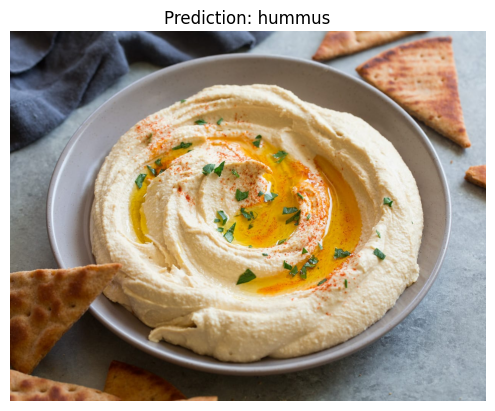

In [ ]:
pred_and_plot(model_2, "")

##Save the model

In [ ]:
model_2.save("model_2")

In [ ]:
# Load a trained model
loaded_model_2 = tf.keras.models.load_model("model_2")
loaded_model_2.evaluate(test_data)

#Multiclass classification

##Load Data

In [4]:
dataset_name = "Food101"

for folder in os.listdir(dataset_dir):
    extract_data(dataset_dir, folder, 0.8, dataset_name)

KeyboardInterrupt: 

##prepare data

In [ ]:
tf.random.set_seed(42)
dataset_name = "Food101"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data_augmented = ImageDataGenerator(rescale=1./255,
                                          rotation_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          width_shift_range=0.2,
                                          height_shift_range=0.3,
                                          horizontal_flip=True)

train_path = f"./dataset/{dataset_name}/train"
test_path = f"./dataset/{dataset_name}/test"

train_data = train_datagen.flow_from_directory(directory=train_path,
                                                batch_size=32,
                                                target_size=(224, 224),
                                                class_mode="categorical",
                                                seed=42)

test_data = test_datagen.flow_from_directory(directory=test_path,
                                                batch_size=32,
                                                target_size=(224, 224),
                                                class_mode="categorical",
                                                seed=42)

class_indices = train_data.class_indices

# Print the class indices
print("Class indices:", class_indices)

# Get the class labels
class_labels = list(class_indices.keys())


##Build the model

In [ ]:
nbr_classes = len(class_indices)

model_3 = Sequential([
    Conv2D(100, 3, input_shape=(224, 224, 3)),
    Activation(activation="relu"),
    Conv2D(100, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(100, 3, activation="relu"),
    Conv2D(100, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(100, 3, activation="relu"),
    Conv2D(100, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(nbr_classes, activation="softmax")
])

model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

##Fit model

In [10]:
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)))

 181/1011 [====>.........................] - ETA: 2:47:09 - loss: 3.5167 - accuracy: 0.0661

KeyboardInterrupt: 

##Evaluate the model

In [ ]:
model_3.evaluate(test_data)

##Test model